<a href="https://colab.research.google.com/github/Capstone-Project-July/Interim/blob/master/Project_Capstone_Model_Building_Final2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from IPython.display import clear_output
from keras.models import Model 
from keras.layers import Embedding, Activation, SpatialDropout1D, Flatten, Dense, Input, LSTM, Bidirectional, Dropout, Conv1D, MaxPool1D, CuDNNLSTM, GlobalMaxPool1D
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
#For stopwords and tokenisation
import string
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing #Changing categorical data to one hot encoding
from nltk.tokenize import RegexpTokenizer
from sklearn.cluster import KMeans
from nltk.stem import PorterStemmer
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from numpy import unique
from numpy import where
from sklearn.cluster import AffinityPropagation #Using this to best summarize the data
from matplotlib import pyplot 

#Models

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras import layers
from keras.layers import Embedding, Activation, SpatialDropout1D, Flatten, Dense, Input, LSTM, Bidirectional, Dropout, Conv1D, MaxPool1D, CuDNNLSTM, GlobalMaxPool1D, MaxPooling1D, GRU


# Hyper Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Using TensorFlow backend.


In [2]:
from google.colab import drive

drive.mount('/content/drive')
#Loading the datafile
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Preprocessed_input_data_.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data.head(100)

,Unnamed: 0,Short description,Description,Assignment group,Assignment group Encoded,Tokens,Tweet Tokens,Cluster,features,Cluster TFIDFV
0,0,login issue,-verified user details.(employee# & manager na...,0,0,"['login', 'ad', 'user', 'reset', 'caller', 'ma...","['login', 'ad', 'user', 'reset', 'caller', 'ma...",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
1,1,outlook,"\r\n\r\nreceived from: \r\n\r\nhello team,\r\n...",0,0,"['meet', 'team', 'outlook', 'calendar', 'skype...","['meet', 'team', 'outlook', 'calendar', 'skype...",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
2,2,cant log in to vpn,\r\n\r\nreceived from: \r\n\r\nhi\r\n\r\ni can...,0,0,"['vpn', 'cant', 'log']","['vpn', 'cant', 'cannot', 'log']",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
3,3,unable to access hr_tool page,unable to access hr_tool page,0,0,"['access', 'tool', 'hr', 'page']","['access', 'tool', 'hr', 'page']",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
4,4,skype error,skype error,0,0,"['error', 'skype']","['error', 'skype']",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
...,...,...,...,...,...,...,...,...,...,...
95,97,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,2,4,"['c', 'sy', 'g', 'label', 'server', 'space']","['c', 'sy', 'amssm', 'g', 'label', 'server', '...",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
96,98,unable to view payslips from hr_tool e time,unable to view payslips from hr_tool e time,0,0,"['e', 'tool', 'view', 'payslip', 'time']","['e', 'tool', 'view', 'payslip', 'time']",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2
97,99,password expiry tomorrow,\n\nreceived from: \n\nmy system says my passw...,0,0,"['expiri', 'expir', 'acceptingâ€¦', 'system', ...","['expiri', 'expir', 'system', 'chang', 'server...",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",0
98,100,re: ess portal access issue,"\n\nreceived from: \n\nhello,\n\nhe is an kios...",0,0,"['confirm', 'access', 'password', 'ihkolepb', ...","['confirm', 'access', 'password', 'ihkolepb', ...",0,"(0, 783)\t0.22351884706152728\n (0, 539)\t0...",2


# **Model to predict the ticket into any of the 3 clusters¶**

In [5]:
X = data['Description'] 
Y = data['Cluster TFIDFV']   
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [6]:
sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='log', penalty='elasticnet',alpha=1e-5, random_state=42, max_iter=35, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)
print(accuracy_score(Y_pred, Y_test))

0.9905090595340811


In [7]:
x=sgd.predict(['unable to view payslips from hr_tool e time'])
if x==2:
  print('Predicted Successfully')
else:
  print('Wrong prediction')

Predicted Successfully


#### **The SGD Classifier is able to predict a Description into a Sub Cluster with 99.3% Accuracy**

In [8]:
def lstmm():
    model = Sequential()
    
    model.add(Embedding(input_dim=max_features, output_dim=embed_dim, input_length=maxlen))
    
    model.add(Bidirectional(LSTM(16, return_sequences=True, recurrent_dropout=0.2, dropout=0.2)))
    
    model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1, dropout=0.4)))

    model.add(Dense(350, activation='softmax'))
        
    # Compile the model
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['acc'])
    
    return model


In [9]:


#1D CNN

def conv1d():
    
    model = Sequential()
    
    model.add(Embedding(input_dim=max_features,output_dim=embed_dim, input_length=maxlen))
    
    model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
    
    model.add(MaxPool1D(pool_size=8))
    
    model.add(Conv1D(filters=32, kernel_size=4, activation='relu'))
    
    model.add(Dropout(0.4))
    
    model.add(GlobalMaxPool1D())
    
    model.add(Dense(350, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics= ['acc'])
    
    return model




# Models for individual clusters

We are using a multiple model approach where the below steps are followed when we get a new Ticket
> The description is analyzed
> It is converted into a TFIDF Vector using TFIDF Vectorizer
> An SGD Classifier is used to predict the subgroup of the ticket
> Once the Sub Group is predicted, the corresponding assignment Groups are predicted using individual models for each sub groups

**Applying different models on CLuster 0**

#### **Chi Square Analysis on Logistic Regression**

In [10]:
X = data['Description'][data['Cluster TFIDFV']==0]
Y = data['Assignment group'][data['Cluster TFIDFV']==0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [11]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [12]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 94.44444444444444
Accuracy Score Train: 91.16945107398568


#### **Creating the TFIDF Vectors for further processing**

In [13]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [14]:
nb = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X,Y)

#Test Set
Y_pred = nb.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nb.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :94.44444444444444


              precision    recall  f1-score   support

           0       0.94      1.00      0.97       170
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         7
          21       0.00      0.00      0.00         2

    accuracy                           0.94       180
   macro avg       0.24      0.25      0.24       180
weighted avg       0.89      0.94      0.92       180



Accuracy Score Train :91.16945107398568


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       382
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        15
           9       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          21       0.00      0.00      0.00        11

    accuracy                           0.91   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [15]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVM.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVM.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVM.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)




Accuracy Score Test:  95.0
Accuracy Score Train :  94.5107398568019


#### **Decision tree**


In [16]:
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTree.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTree.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTree.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTree.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTree.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  94.44444444444444
Accuracy Score Train :  95.70405727923628


#### **Bagging Classifier**

In [17]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(train_vectors_0, Y_train)

y_predict = bgcl.predict(test_vectors_0)

print('Accuracy Score Test : ',bgcl.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgcl.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgcl.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  93.88888888888889
Accuracy Score Train :  94.03341288782816


#### **Adaboost Classifier**

In [18]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(train_vectors_0, Y_train)

y_predict = abcl.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abcl.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abcl.score(test_vectors_0, Y_test)*100)


y_predict = abcl.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  94.44444444444444
Accuracy Score Train :  93.31742243436753


#### **Gradient Boost Classifier**



In [19]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(train_vectors_0, Y_train)

y_predict = gbcl.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbcl.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbcl.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  93.33333333333333
Accuracy Score Train :  99.52267303102626


#### **Out of all the models Decision Tree has the highest accuracy to predict the final class of cluster 0 and the lowest overfitting**

#### **Randomized Search CV to enhance Decision tree**



In [20]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTree, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=34, criterion=gini ....................................
[CV] ...........

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. max_depth=84, criterion=entropy, total=   0.0s
[CV] max_depth=84, criterion=entropy .................................
[CV] .................. max_depth=84, criterion=entropy, total=   0.0s
[CV] max_depth=98, criterion=entropy .................................
[CV] .................. max_depth=98, criterion=entropy, total=   0.0s
[CV] max_depth=98, criterion=entropy .................................
[CV] .................. max_depth=98, criterion=entropy, total=   0.0s
[CV] max_depth=98, criterion=entropy .................................
[CV] .................. max_depth=98, criterion=entropy, total=   0.0s
[CV] max_depth=95, criterion=gini ....................................
[CV] ..................... max_depth=95, criterion=gini, total=   0.0s
[CV] max_depth=95, criterion=gini ....................................
[CV] ..................... max_depth=95, criterion=gini, total=   0.0s
[CV] max_depth=95, criterion=gini ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [21]:
random_searchdt.best_params_



{'criterion': 'entropy', 'max_depth': 2}

In [22]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth=2,random_state=1)
dTree.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTree.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTree.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTree.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTree.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  94.44444444444444
Accuracy Score Train :  93.07875894988067


#### With the randomized search, it seems that we have a lower accuracy

In [23]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVM, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  kernel=poly, gamma=scale, degree=1, C=2.6999999999999997, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=1, C=2.6999999999999997 ........
[CV]  kernel=poly, gamma=scale, degree=1, C=2.6999999999999997, total=   0.0s
[CV] kernel=poly, gamma=scale, degree=1, C=2.6999999999999997 ........
[CV]  kernel=poly, gamma=scale, degree=1, C=2.6999999999999997, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=1, C=0.6 ........................
[CV] ......... kernel=rbf, gamma=scale, degree=1, C=0.6, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=1, C=0.6 ........................
[CV] ......... kernel=rbf, gamma=scale, degree=1, C=0.6, total=   0.0s
[CV] kernel=rbf, gamma=scale, degree=1, C=0.6 ........................
[CV] ......... kernel=rbf, gamma=scale, degree=1, C=0.6, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=1, C=0.8999999999999999 ..........
[CV]  kernel=rbf, gamma=auto, degree=1, C=0.8999999999999999, total=   0.0s
[CV] kernel=rbf, gamma=auto, degree=1, C=0.89999999

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [24]:
random_searchSVM.best_params_



{'C': 0.7, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}

In [25]:
SVM = svm.SVC(C=0.7, kernel='rbf', degree=4, gamma='auto')
SVM.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVM.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVM.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  94.44444444444444
Accuracy Score Train :  91.16945107398568


#### **Sequential Model**

In [26]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

In [27]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'][data['Cluster TFIDFV']==0])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'][data['Cluster TFIDFV']==0])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(419, 350) (419,)
(180, 350) (180,)


In [28]:
models = Sequential()
models.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
models.add(SpatialDropout1D(0.4))
models.add(MaxPooling1D(pool_size=4))
models.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
models.add(Dense(350,activation='softmax'))
models.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(models.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_1 (Dense)              (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
models.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=40, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = models.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = models.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 419 samples, validate on 180 samples
Epoch 1/40
 - 5s - loss: 4.9270 - accuracy: 0.8282 - val_loss: 2.5556 - val_accuracy: 0.9111
Epoch 2/40
 - 3s - loss: 1.3034 - accuracy: 0.9260 - val_loss: 0.5711 - val_accuracy: 0.9111
Epoch 3/40
 - 3s - loss: 0.4505 - accuracy: 0.9260 - val_loss: 0.4892 - val_accuracy: 0.9111
Epoch 4/40
 - 3s - loss: 0.4163 - accuracy: 0.9260 - val_loss: 0.4566 - val_accuracy: 0.9111
Epoch 5/40
 - 3s - loss: 0.3938 - accuracy: 0.9260 - val_loss: 0.4337 - val_accuracy: 0.9111
Epoch 6/40
 - 3s - loss: 0.3891 - accuracy: 0.9260 - val_loss: 0.4302 - val_accuracy: 0.9111
Epoch 7/40
 - 3s - loss: 0.3868 - accuracy: 0.9260 - val_loss: 0.4250 - val_accuracy: 0.9111
Epoch 8/40
 - 3s - loss: 0.3822 - accuracy: 0.9260 - val_loss: 0.4248 - val_accuracy: 0.9111
Epoch 9/40
 - 3s - loss: 0.3816 - accuracy: 0.9260 - val_loss: 0.4262 - val_accuracy: 0.9111
Epoch 10/40
 - 3s - loss: 0.3805 - accuracy: 0.9260 - val_loss: 0.4259 - val_accuracy: 0.9111
Epoch 11/40
 - 3s - los

#### **Bidirectional LSTM**

In [30]:
lsmod1 = lstmm()

lshist = lsmod1.fit(X_train,Y_train,
         epochs = 30,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 419 samples, validate on 180 samples
Epoch 1/30
419/419 [==============================] - 11s 25ms/step - loss: 5.8305 - acc: 0.2530 - val_loss: 5.7438 - val_acc: 0.9111
Epoch 2/30
419/419 [==============================] - 6s 14ms/step - loss: 5.6842 - acc: 0.9236 - val_loss: 5.5097 - val_acc: 0.9111
Epoch 3/30
419/419 [==============================] - 6s 15ms/step - loss: 5.4107 - acc: 0.9260 - val_loss: 5.0846 - val_acc: 0.9111
Epoch 4/30
419/419 [==============================] - 7s 16ms/step - loss: 4.9724 - acc: 0.9260 - val_loss: 4.4452 - val_acc: 0.9111
Epoch 5/30
419/419 [==============================] - 7s 16ms/step - loss: 4.3280 - acc: 0.9260 - val_loss: 3.6602 - val_acc: 0.9111
Epoch 6/30
419/419 [==============================] - 6s 15ms/step - loss: 3.5784 - acc: 0.9260 - val_loss: 2.8987 - val_acc: 0.9111
Epoch 7/30
419/419 [==============================] - 6s 15ms/step - loss: 2.7853 - acc: 0.9260 - val_loss: 2.2218 - val_acc: 0.9111
Epoch 8/30
419/419 [==

In [31]:
model.append('Bidirectional LSTM Model')
scores = lsmod1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmod1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




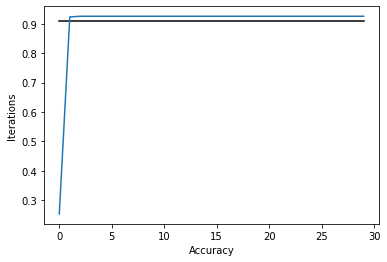

In [32]:
plt.plot(lshist.history['val_acc'],color='black')
plt.plot(lshist.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

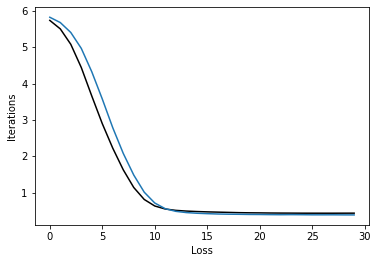

In [33]:
plt.plot(lshist.history['val_loss'],color='black')
plt.plot(lshist.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [34]:

convmod = conv1d()

convhist = convmod.fit(X_train, Y_train,
                      epochs = 30,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 419 samples, validate on 180 samples
Epoch 1/30
419/419 [==============================] - 3s 7ms/step - loss: 5.7672 - acc: 0.6158 - val_loss: 5.6580 - val_acc: 0.9111
Epoch 2/30
419/419 [==============================] - 3s 7ms/step - loss: 5.3853 - acc: 0.9260 - val_loss: 5.2780 - val_acc: 0.9111
Epoch 3/30
419/419 [==============================] - 3s 6ms/step - loss: 4.6250 - acc: 0.9260 - val_loss: 4.5534 - val_acc: 0.9111
Epoch 4/30
419/419 [==============================] - 2s 6ms/step - loss: 3.2514 - acc: 0.9260 - val_loss: 3.2851 - val_acc: 0.9111
Epoch 5/30
419/419 [==============================] - 3s 6ms/step - loss: 1.3549 - acc: 0.9260 - val_loss: 1.5162 - val_acc: 0.9111
Epoch 6/30
419/419 [==============================] - 3s 6ms/step - loss: 0.5886 - acc: 0.9260 - val_loss: 0.6665 - val_acc: 0.9111
Epoch 7/30
419/419 [==============================] - 3s 7ms/step - loss: 0.7112 - acc: 0.9260 - val_loss: 0.5740 - val_acc: 0.9111
Epoch 8/30
419/419 [==========

In [35]:
model.append('1D Convolution Model')
scores = convmod.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmod.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

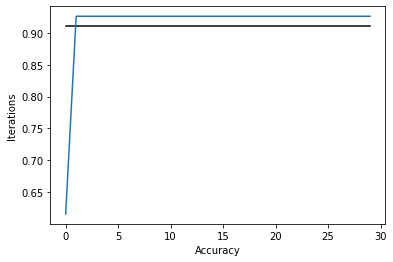

In [36]:
plt.plot(convhist.history['val_acc'],color='black')
plt.plot(convhist.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

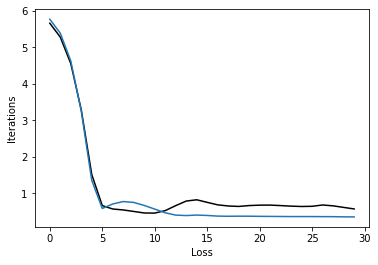

In [37]:
plt.plot(convhist.history['val_loss'],color='black')
plt.plot(convhist.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 1**


In [38]:
cluster0_accuracies=pd.DataFrame()
cluster0_accuracies['Model']=model
cluster0_accuracies['Accuracy(Test)']=accuracytest
cluster0_accuracies['Accuracy(Train)']=accuracytrain
cluster0_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,94.444444,91.169451
1,Multinomial Naive Bayes,94.444444,91.169451
2,Support Vector Machines,95.000000,94.510740
3,Decision Tree,94.444444,95.704057
4,Bagging Classifier,93.888889,94.033413
5,Adaboost Classifier,94.444444,93.317422
6,Gradient Boost Classifier,93.333333,99.522673
7,Decision Tree Hyper Tuned,94.444444,93.078759
8,Support Vector Machines- Hypertuned,94.444444,91.169451
9,Sequential Model,91.111112,92.840093


In [39]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']

<BarContainer object of 12 artists>

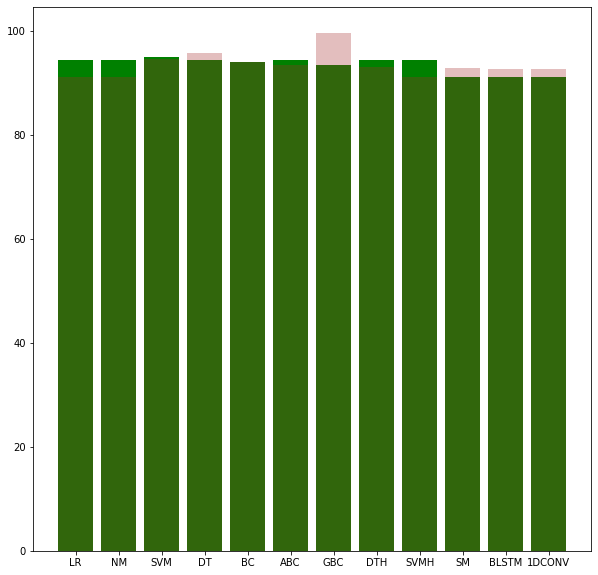

In [40]:
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster0_accuracies['Accuracy(Test)'],color='green')
plt.bar(x_axis,cluster0_accuracies['Accuracy(Train)'],color='brown',alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Decision Tree seems to be the best of all


# **Applying different models on Cluster 1**

#### **Chi Square Analysis on Logistic Regression**

In [41]:
X = data['Description'][data['Cluster TFIDFV']==1]
Y = data['Assignment group'][data['Cluster TFIDFV']==1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [42]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [43]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 41.97080291970803
Accuracy Score Train: 46.165884194053206


#### **Creating the TFIDF Vectors for further processing**

In [44]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [45]:
nbc1 = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nbc1.fit(X,Y)

#Test Set
Y_pred = nbc1.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nbc1.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :49.63503649635037


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          19       1.00      0.03      0.06        31
          20       0.00      0.00      0.00        43
          22       0.46      1.00      0.63       115
          23       0.95      0.40      0.56        50

    accuracy                           0.50       274
   macro avg       0.27      0.16      0.14       274
weighted avg       0.48      0.50      0.37       274



Accuracy Score Train :56.65101721439749


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [46]:
SVMc1 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVMc1.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc1.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc1.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)




Accuracy Score Test:  67.88321167883211
Accuracy Score Train :  83.4115805946792


#### **Decision tree**


In [47]:
dTreec1 = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTreec1.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec1.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTreec1.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec1.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec1.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  48.54014598540146
Accuracy Score Train :  54.61658841940532


#### **Bagging Classifier**

In [48]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(train_vectors_0, Y_train)

y_predict = bgcl.predict(test_vectors_0)

print('Accuracy Score Test : ',bgcl.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgcl.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgcl.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  46.35036496350365
Accuracy Score Train :  49.13928012519562


#### **Adaboost Classifier**

In [49]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(train_vectors_0, Y_train)

y_predict = abcl.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abcl.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abcl.score(test_vectors_0, Y_test)*100)


y_predict = abcl.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  45.62043795620438
Accuracy Score Train :  49.45226917057903


#### **Gradient Boost Classifier**



In [50]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(train_vectors_0, Y_train)

y_predict = gbcl.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbcl.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbcl.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbcl.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbcl.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  64.23357664233576
Accuracy Score Train :  86.07198748043818


#### **Randomized Search CV to enhance Decision tree**



In [51]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTreec1, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.0s
[CV] max_depth=34, criterion=gini ....................................
[CV] ...........

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... max_depth=34, criterion=gini, total=   0.0s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.0s
[CV] max_depth=2, criterion=entropy ..................................
[CV] ................... max_depth=2, criterion=entropy, total=   0.0s
[CV] max_depth=2, criterion=entropy ..................................
[CV] ................... max_depth=2, criterion=entropy, total=   0.0s
[CV] max_depth=2, criterion=entropy ..................................
[CV] ................... max_depth=2, criterion=entropy, total=   0.0s
[CV] max_depth=84, criterion=entropy .................................
[CV] .................. max_depth=84, criterion=entropy, total=   0.1s
[CV] max_depth=84, criterion=entropy .................................
[CV] .................. max_depth=84, criterion=entropy, total=   0.0s
[CV] max_depth=84, criterion=entropy .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [52]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 40}

In [53]:
dTreec11 = DecisionTreeClassifier(criterion = 'gini', max_depth=40,random_state=1)
dTreec11.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec11.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTreec11.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec11.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec11.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  50.36496350364964
Accuracy Score Train :  86.85446009389672


#### With the randomized search, it seems that we have a lower accuracy

In [54]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVMc1, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.1s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.1s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   0.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   0.1s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   0.0s
[CV] kernel=poly, gamma=scale, d

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.4s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [55]:
random_searchSVM.best_params_

{'C': 2.6999999999999997, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [56]:
SVMc11 = svm.SVC(C=2.69, kernel='poly', degree=1, gamma='scale')
SVMc11.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc11.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc11.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  73.72262773722628
Accuracy Score Train :  95.77464788732394


#### **Sequential Model**

In [57]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'][data['Cluster TFIDFV']==1])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'][data['Cluster TFIDFV']==1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(639, 350) (639,)
(274, 350) (274,)


In [58]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelsc1 = Sequential()
modelsc1.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelsc1.add(SpatialDropout1D(0.4))
modelsc1.add(MaxPooling1D(pool_size=4))
modelsc1.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelsc1.add(Dense(350,activation='softmax'))
modelsc1.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelsc1.summary())



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_4 (Dense)              (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
histc1=modelsc1.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=40, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = modelsc1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = modelsc1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 639 samples, validate on 274 samples
Epoch 1/40
 - 6s - loss: 4.6500 - accuracy: 0.4053 - val_loss: 2.5872 - val_accuracy: 0.4599
Epoch 2/40
 - 5s - loss: 1.9323 - accuracy: 0.4444 - val_loss: 1.6070 - val_accuracy: 0.4599
Epoch 3/40
 - 5s - loss: 1.6004 - accuracy: 0.4444 - val_loss: 1.5098 - val_accuracy: 0.4599
Epoch 4/40
 - 5s - loss: 1.5635 - accuracy: 0.4444 - val_loss: 1.5241 - val_accuracy: 0.4599
Epoch 5/40
 - 5s - loss: 1.5543 - accuracy: 0.4444 - val_loss: 1.5078 - val_accuracy: 0.4599
Epoch 6/40
 - 5s - loss: 1.5535 - accuracy: 0.4444 - val_loss: 1.5078 - val_accuracy: 0.4599
Epoch 7/40
 - 5s - loss: 1.5513 - accuracy: 0.4444 - val_loss: 1.5099 - val_accuracy: 0.4599
Epoch 8/40
 - 5s - loss: 1.5474 - accuracy: 0.4444 - val_loss: 1.5108 - val_accuracy: 0.4599
Epoch 9/40
 - 5s - loss: 1.5470 - accuracy: 0.4444 - val_loss: 1.5065 - val_accuracy: 0.4599
Epoch 10/40
 - 4s - loss: 1.5409 - accuracy: 0.4444 - val_loss: 1.4993 - val_accuracy: 0.4599
Epoch 11/40
 - 4s - los

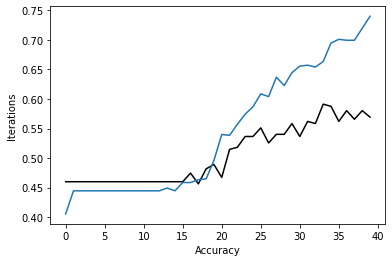

In [60]:
plt.plot(histc1.history['val_accuracy'],color='black')
plt.plot(histc1.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

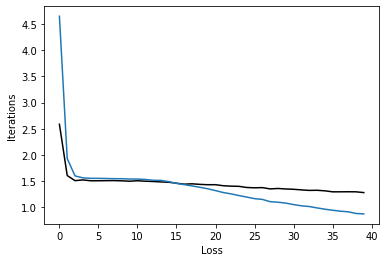

In [61]:
plt.plot(histc1.history['val_loss'],color='black')
plt.plot(histc1.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Bidirectional LSTM**

In [62]:

lsmodc1 = lstmm()

lshistc1 = lsmodc1.fit(X_train,Y_train,
         epochs = 45,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 639 samples, validate on 274 samples
Epoch 1/45
639/639 [==============================] - 14s 21ms/step - loss: 5.8314 - acc: 0.1706 - val_loss: 5.7734 - val_acc: 0.4599
Epoch 2/45
639/639 [==============================] - 9s 15ms/step - loss: 5.7086 - acc: 0.4382 - val_loss: 5.5622 - val_acc: 0.4599
Epoch 3/45
639/639 [==============================] - 9s 15ms/step - loss: 5.4331 - acc: 0.4444 - val_loss: 5.1141 - val_acc: 0.4599
Epoch 4/45
639/639 [==============================] - 9s 14ms/step - loss: 4.9593 - acc: 0.4444 - val_loss: 4.4969 - val_acc: 0.4599
Epoch 5/45
639/639 [==============================] - 9s 14ms/step - loss: 4.3251 - acc: 0.4444 - val_loss: 3.8110 - val_acc: 0.4599
Epoch 6/45
639/639 [==============================] - 9s 14ms/step - loss: 3.6126 - acc: 0.4444 - val_loss: 3.1212 - val_acc: 0.4599
Epoch 7/45
639/639 [==============================] - 9s 15ms/step - loss: 2.9248 - acc: 0.4444 - val_loss: 2.4964 - val_acc: 0.4599
Epoch 8/45
639/639 [==

In [63]:
model.append('Bidirectional LSTM Model')
scores = lsmodc1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmodc1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




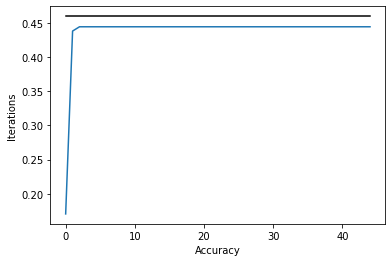

In [64]:
plt.plot(lshistc1.history['val_acc'],color='black')
plt.plot(lshistc1.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

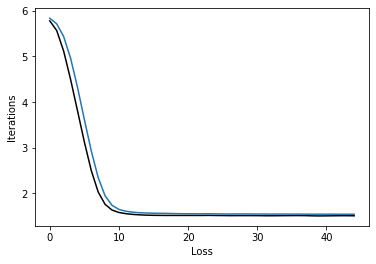

In [65]:
plt.plot(lshistc1.history['val_loss'],color='black')
plt.plot(lshistc1.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [66]:

convmodc1 = conv1d()



convhistc1 = convmodc1.fit(X_train, Y_train,
                      epochs = 45,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 639 samples, validate on 274 samples
Epoch 1/45
639/639 [==============================] - 5s 8ms/step - loss: 5.8345 - acc: 0.0000e+00 - val_loss: 5.7865 - val_acc: 0.0000e+00
Epoch 2/45
639/639 [==============================] - 4s 7ms/step - loss: 5.6825 - acc: 0.0094 - val_loss: 5.6060 - val_acc: 0.1168
Epoch 3/45
639/639 [==============================] - 4s 6ms/step - loss: 5.3166 - acc: 0.0845 - val_loss: 5.2032 - val_acc: 0.1277
Epoch 4/45
639/639 [==============================] - 4s 6ms/step - loss: 4.5487 - acc: 0.1142 - val_loss: 4.3910 - val_acc: 0.1277
Epoch 5/45
639/639 [==============================] - 4s 7ms/step - loss: 3.2423 - acc: 0.1142 - val_loss: 3.0675 - val_acc: 0.1277
Epoch 6/45
639/639 [==============================] - 4s 7ms/step - loss: 2.1490 - acc: 0.2551 - val_loss: 1.9610 - val_acc: 0.4599
Epoch 7/45
639/639 [==============================] - 5s 7ms/step - loss: 1.7949 - acc: 0.4444 - val_loss: 1.6571 - val_acc: 0.4599
Epoch 8/45
639/639 [==

In [67]:
model.append('1D Convolution Model')
scores = convmodc1.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmodc1.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

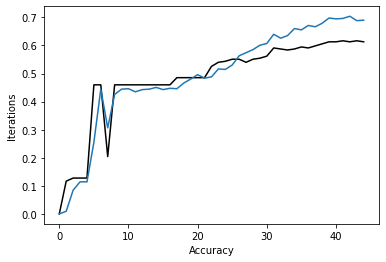

In [68]:
plt.plot(convhistc1.history['val_acc'],color='black')
plt.plot(convhistc1.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

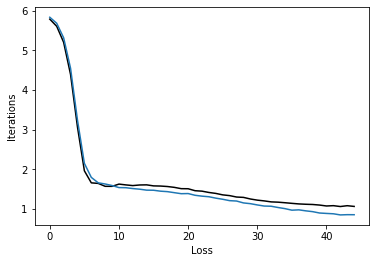

In [69]:
plt.plot(convhistc1.history['val_loss'],color='black')
plt.plot(convhistc1.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 1**


In [70]:
cluster1_accuracies=pd.DataFrame()
cluster1_accuracies['Model']=model
cluster1_accuracies['Accuracy(Test)']=accuracytest
cluster1_accuracies['Accuracy(Train)']=accuracytrain
cluster1_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,41.970803,46.165884
1,Multinomial Naive Bayes,49.635036,56.651017
2,Support Vector Machines,67.883212,83.411581
3,Decision Tree,48.540146,54.616588
4,Bagging Classifier,46.350365,49.139280
5,Adaboost Classifier,45.620438,49.452269
6,Gradient Boost Classifier,64.233577,86.071987
7,Decision Tree Hyper Tuned,50.364964,86.854460
8,Support Vector Machines- Hypertuned,73.722628,95.774648
9,Sequential Model,56.934309,74.021912


<BarContainer object of 12 artists>

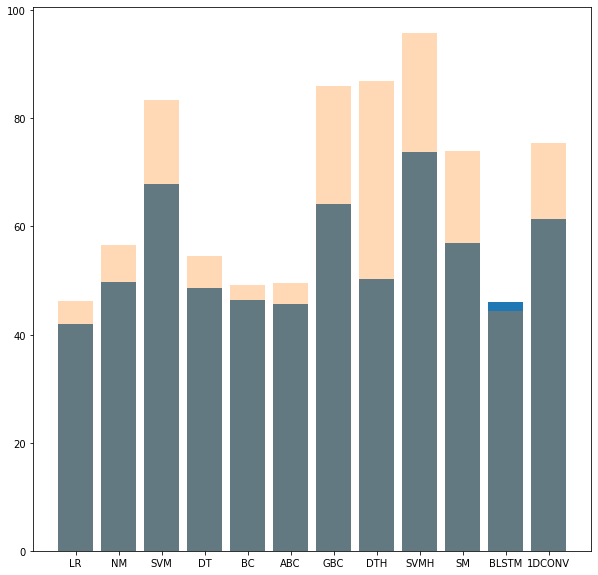

In [71]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster1_accuracies['Accuracy(Test)'])
plt.bar(x_axis,cluster1_accuracies['Accuracy(Train)'],alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Support Vector Machines seems to be the best of all


# **Applying different models on Cluster 2**

#### **Chi Square Analysis on Logistic Regression**

In [72]:
X = data['Description'][data['Cluster TFIDFV']==2]
Y = data['Assignment group'][data['Cluster TFIDFV']==2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [73]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [74]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 55.04291845493562
Accuracy Score Train: 56.18675252989881


#### **Creating the TFIDF Vectors for further processing**

In [75]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [76]:
nbc2 = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nbc2.fit(X,Y)

#Test Set
Y_pred = nbc2.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nbc2.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :60.622317596566525


              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1010
           1       0.00      0.00      0.00        29
           2       0.93      0.20      0.33        65
           3       0.00      0.00      0.00        51
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00        23
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        73
           9       1.00      0.01      0.03        75
          10       1.00      0.62      0.77        85
          11       0.00      0.00      0.00        37
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        67
          15       1.00      0.04      0.07        28
          16       0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [77]:
SVMc2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVMc2.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc2.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc2.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  70.70815450643777
Accuracy Score Train :  87.14351425942962


#### **Decision tree**


In [78]:
dTreec2 = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTreec2.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec2.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTreec2.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec2.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  58.798283261802574
Accuracy Score Train :  61.08555657773689


#### **Bagging Classifier**

In [79]:
bgc2 = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgc2 = bgc2.fit(train_vectors_0, Y_train)

y_predict = bgc2.predict(test_vectors_0)

print('Accuracy Score Test : ',bgc2.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgc2.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgc2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgc2.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  56.65236051502146
Accuracy Score Train :  57.796688132474706


#### **Adaboost Classifier**

In [80]:
abc2 = AdaBoostClassifier(n_estimators=10, random_state=1)
abc2 = abc2.fit(train_vectors_0, Y_train)

y_predict = abc2.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abc2.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abc2.score(test_vectors_0, Y_test)*100)


y_predict = abc2.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abc2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abc2.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  57.72532188841202
Accuracy Score Train :  59.08463661453543


#### **Gradient Boost Classifier**



In [81]:
gbc2 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbc2 = gbc2.fit(train_vectors_0, Y_train)

y_predict = gbc2.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbc2.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbc2.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbc2.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbc2.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  65.98712446351931
Accuracy Score Train :  93.90524379024839


#### **Randomized Search CV to enhance Decision tree**



In [82]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTreec2, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=58, criterion=gini, total=   0.7s
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... max_depth=58, criterion=gini, total=   0.7s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.7s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.6s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.6s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.6s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.5s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.6s
[CV] max_depth=34, criterion=gini ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   21.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [83]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 29}

In [84]:
dTreec22 = DecisionTreeClassifier(criterion = 'gini', max_depth=40,random_state=1)
dTreec22.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreec22.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTreec22.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreec22.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreec22.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  62.392703862660944
Accuracy Score Train :  82.24471021159154


#### With the randomized search, it seems that we have a lower accuracy

In [85]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVMc2, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   2.8s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   2.8s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   2.7s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   5.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   5.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   5.0s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   2.1s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   2.1s
[CV] kernel=poly, gamma=auto, degree=0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [86]:
random_searchSVM.best_params_

{'C': 2.6999999999999997, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [87]:
SVMc22 = svm.SVC(C=2.69, kernel='poly', degree=1, gamma='scale')
SVMc22.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMc22.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMc22.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  73.12231759656652
Accuracy Score Train :  98.06807727690892


#### **Sequential Model**

In [88]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'][data['Cluster TFIDFV']==2])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'][data['Cluster TFIDFV']==2])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4348, 350) (4348,)
(1864, 350) (1864,)


In [89]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelsc2 = Sequential()
modelsc2.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelsc2.add(SpatialDropout1D(0.4))
modelsc2.add(MaxPooling1D(pool_size=4))
modelsc2.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelsc2.add(Dense(350,activation='softmax'))
modelsc2.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelsc2.summary())



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_7 (Dense)              (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [90]:
histc2=modelsc2.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = modelsc2.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = modelsc2.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4348 samples, validate on 1864 samples
Epoch 1/30
 - 35s - loss: 2.4727 - accuracy: 0.5458 - val_loss: 2.0648 - val_accuracy: 0.5408
Epoch 2/30
 - 33s - loss: 1.9361 - accuracy: 0.5593 - val_loss: 1.8836 - val_accuracy: 0.5574
Epoch 3/30
 - 34s - loss: 1.7020 - accuracy: 0.5869 - val_loss: 1.7092 - val_accuracy: 0.5762
Epoch 4/30
 - 34s - loss: 1.5272 - accuracy: 0.6115 - val_loss: 1.6287 - val_accuracy: 0.5971
Epoch 5/30
 - 33s - loss: 1.4109 - accuracy: 0.6341 - val_loss: 1.5909 - val_accuracy: 0.6030
Epoch 6/30
 - 33s - loss: 1.3263 - accuracy: 0.6525 - val_loss: 1.5766 - val_accuracy: 0.6094
Epoch 7/30
 - 33s - loss: 1.2484 - accuracy: 0.6598 - val_loss: 1.5467 - val_accuracy: 0.6180
Epoch 8/30
 - 32s - loss: 1.1774 - accuracy: 0.6780 - val_loss: 1.5637 - val_accuracy: 0.6041
Epoch 9/30
 - 34s - loss: 1.0991 - accuracy: 0.6923 - val_loss: 1.5390 - val_accuracy: 0.6014
Epoch 10/30
 - 33s - loss: 1.0287 - accuracy: 0.7123 - val_loss: 1.5325 - val_accuracy: 0.6148
Epoch 11/30

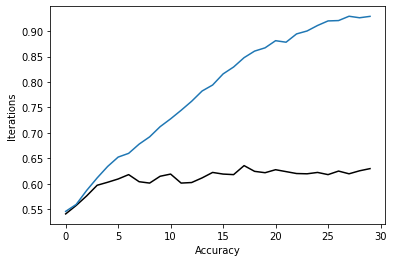

In [91]:
plt.plot(histc2.history['val_accuracy'],color='black')
plt.plot(histc2.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

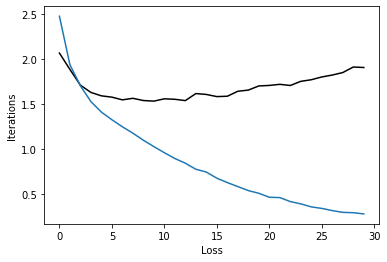

In [92]:
plt.plot(histc2.history['val_loss'],color='black')
plt.plot(histc2.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Bidirectional LSTM**

In [93]:

lsmodc2 = lstmm()

lshistc2 = lsmodc2.fit(X_train,Y_train,
         epochs = 30,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4348 samples, validate on 1864 samples
Epoch 1/30
4348/4348 [==============================] - 68s 16ms/step - loss: 4.7301 - acc: 0.4940 - val_loss: 2.9131 - val_acc: 0.5408
Epoch 2/30
4348/4348 [==============================] - 63s 14ms/step - loss: 2.2602 - acc: 0.5531 - val_loss: 2.1115 - val_acc: 0.5408
Epoch 3/30
4348/4348 [==============================] - 63s 15ms/step - loss: 2.0371 - acc: 0.5531 - val_loss: 2.0765 - val_acc: 0.5408
Epoch 4/30
4348/4348 [==============================] - 65s 15ms/step - loss: 2.0221 - acc: 0.5531 - val_loss: 2.0614 - val_acc: 0.5408
Epoch 5/30
4348/4348 [==============================] - 66s 15ms/step - loss: 2.0008 - acc: 0.5531 - val_loss: 2.0306 - val_acc: 0.5408
Epoch 6/30
4348/4348 [==============================] - 62s 14ms/step - loss: 1.9518 - acc: 0.5531 - val_loss: 1.9896 - val_acc: 0.5408
Epoch 7/30
4348/4348 [==============================] - 63s 15ms/step - loss: 1.8792 - acc: 0.5531 - val_loss: 1.9294 - val_acc: 0.5408


In [94]:
model.append('Bidirectional LSTM Model')
scores = lsmodc2.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmodc2.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




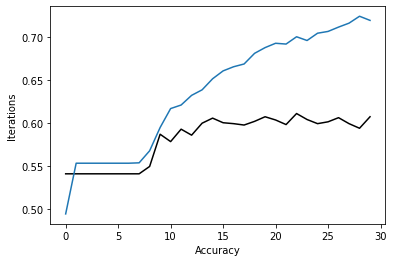

In [95]:
plt.plot(lshistc2.history['val_acc'],color='black')
plt.plot(lshistc2.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

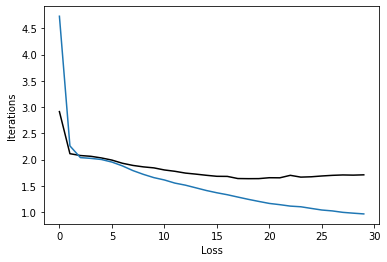

In [96]:
plt.plot(lshistc2.history['val_loss'],color='black')
plt.plot(lshistc2.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [97]:
  
convmodc2 = conv1d()



convhistc2 = convmodc2.fit(X_train, Y_train,
                      epochs = 30,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4348 samples, validate on 1864 samples
Epoch 1/30
4348/4348 [==============================] - 29s 7ms/step - loss: 4.0839 - acc: 0.4777 - val_loss: 2.8378 - val_acc: 0.5402
Epoch 2/30
4348/4348 [==============================] - 28s 6ms/step - loss: 2.0834 - acc: 0.5722 - val_loss: 2.3557 - val_acc: 0.5579
Epoch 3/30
4348/4348 [==============================] - 30s 7ms/step - loss: 1.8544 - acc: 0.5800 - val_loss: 2.1300 - val_acc: 0.5703
Epoch 4/30
4348/4348 [==============================] - 28s 7ms/step - loss: 1.7123 - acc: 0.5872 - val_loss: 1.9702 - val_acc: 0.5874
Epoch 5/30
4348/4348 [==============================] - 29s 7ms/step - loss: 1.5527 - acc: 0.6033 - val_loss: 1.7841 - val_acc: 0.5982
Epoch 6/30
4348/4348 [==============================] - 30s 7ms/step - loss: 1.4076 - acc: 0.6168 - val_loss: 1.6195 - val_acc: 0.6009
Epoch 7/30
4348/4348 [==============================] - 28s 6ms/step - loss: 1.2902 - acc: 0.6481 - val_loss: 1.5441 - val_acc: 0.6325
Epoch 8

In [98]:
model.append('1D Convolution Model')
scores = convmodc2.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmodc2.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

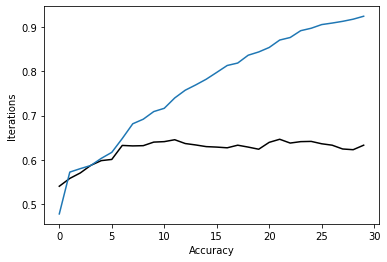

In [99]:
plt.plot(convhistc2.history['val_acc'],color='black')
plt.plot(convhistc2.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

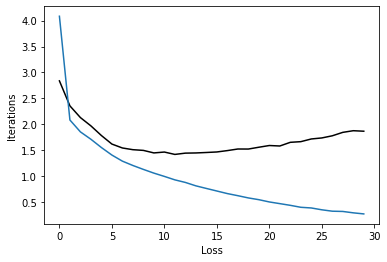

In [100]:
plt.plot(convhistc2.history['val_loss'],color='black')
plt.plot(convhistc2.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 2**


In [101]:
cluster1_accuracies=pd.DataFrame()
cluster1_accuracies['Model']=model
cluster1_accuracies['Accuracy(Test)']=accuracytest
cluster1_accuracies['Accuracy(Train)']=accuracytrain
cluster1_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,55.042918,56.186753
1,Multinomial Naive Bayes,60.622318,62.258510
2,Support Vector Machines,70.708155,87.143514
3,Decision Tree,58.798283,61.085557
4,Bagging Classifier,56.652361,57.796688
5,Adaboost Classifier,57.725322,59.084637
6,Gradient Boost Classifier,65.987124,93.905244
7,Decision Tree Hyper Tuned,62.392704,82.244710
8,Support Vector Machines- Hypertuned,73.122318,98.068077
9,Sequential Model,62.982833,94.641215


<BarContainer object of 12 artists>

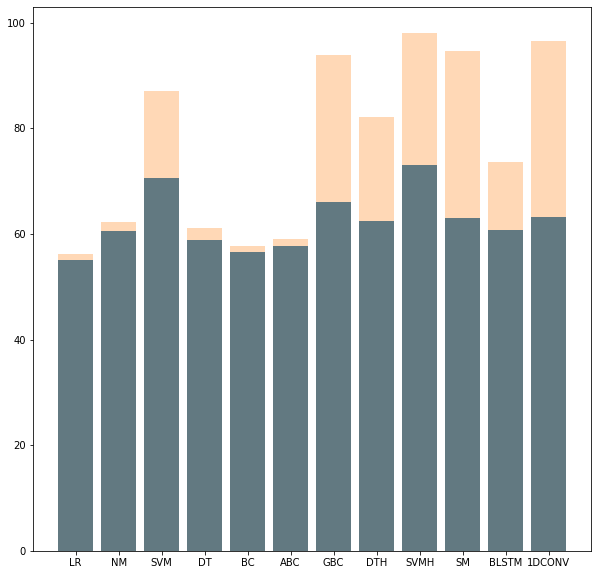

In [102]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster1_accuracies['Accuracy(Test)'])
plt.bar(x_axis,cluster1_accuracies['Accuracy(Train)'],alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Support Vector Machines seems to be the best of all


# **Applying models on the entire data without clustering**

In [103]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data.Description)
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5406, 350) (5406,)
(2318, 350) (2318,)


In [104]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelq = Sequential()
modelq.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelq.add(SpatialDropout1D(0.4))
modelq.add(MaxPooling1D(pool_size=4))
modelq.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelq.add(Dense(350,activation='softmax'))
modelq.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelq.summary())



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               142800    
_________________________________________________________________
dense_10 (Dense)             (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
modelq.fit(X,Y, validation_data = (X_test, Y_test), epochs=10, batch_size=32, verbose=2) 
# Final evaluation of the model
scores = modelq.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7724 samples, validate on 2318 samples
Epoch 1/10
 - 58s - loss: 2.2850 - accuracy: 0.5277 - val_loss: 1.7901 - val_accuracy: 0.5966
Epoch 2/10
 - 57s - loss: 1.6630 - accuracy: 0.5965 - val_loss: 1.5090 - val_accuracy: 0.6135
Epoch 3/10
 - 56s - loss: 1.4718 - accuracy: 0.6168 - val_loss: 1.3721 - val_accuracy: 0.6346
Epoch 4/10
 - 59s - loss: 1.3637 - accuracy: 0.6335 - val_loss: 1.2633 - val_accuracy: 0.6471
Epoch 5/10
 - 57s - loss: 1.2747 - accuracy: 0.6463 - val_loss: 1.1767 - val_accuracy: 0.6570
Epoch 6/10
 - 57s - loss: 1.1982 - accuracy: 0.6565 - val_loss: 1.1079 - val_accuracy: 0.6803
Epoch 7/10
 - 56s - loss: 1.1293 - accuracy: 0.6744 - val_loss: 1.0226 - val_accuracy: 0.7032
Epoch 8/10
 - 57s - loss: 1.0602 - accuracy: 0.6917 - val_loss: 0.9659 - val_accuracy: 0.7166
Epoch 9/10
 - 57s - loss: 0.9982 - accuracy: 0.7084 - val_loss: 0.8909 - val_accuracy: 0.7394
Epoch 10/10
 - 58s - loss: 0.9440 - accuracy: 0.7209 - val_loss: 0.8383 - val_accuracy: 0.7575
Accuracy: 7

#### **Chi Square Analysis on Logistic Regression**

In [106]:
X = data['Description']
Y = data['Assignment group']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [107]:
Cluster1df=pd.DataFrame()
accuracytest=[]
accuracytrain=[]
model=[]

In [108]:
features = TfidfVectorizer(max_features=10000,ngram_range=(1, 3))
X_train_tfidf = features.fit_transform(X_train)
X_test_tfidf = features.transform(X_test)
chi2score = chi2(X_train_tfidf, Y_train)[1]
ch2_result = [0]
ch2_result1=[0]
model.append('Logistic Regression with Chi Square')
for n in np.arange(15000,100000,10000):
    ch2 = SelectKBest(chi2, k=1)
    X_train_chi2_selected = ch2.fit_transform(X_train_tfidf, Y_train)
    X_test_chi2_selected = ch2.transform(X_test_tfidf)
    clf = LogisticRegression()
    clf.fit(X_train_chi2_selected, Y_train)
    score = clf.score(X_test_chi2_selected, Y_test)
    score1=clf.score(X_train_chi2_selected, Y_train)

    if int(score*100)>np.array(ch2_result).max()*100:
      print('Accuracy Score Test: '+str(score*100))
      max=score
    else:
      pass
    ch2_result.append(score)

    if int(score1*100)>np.array(ch2_result1).max()*100:
      print('Accuracy Score Train: '+str(score1*100))
      max1=score1
    else:
      pass
    ch2_result.append(score)
    ch2_result1.append(score1)
accuracytest.append(max*100)
accuracytrain.append(max1*100)

Accuracy Score Test: 52.717860224331325
Accuracy Score Train: 51.775804661487236


#### **Creating the TFIDF Vectors for further processing**

In [109]:
vectorizer = TfidfVectorizer()
train_vectors_0 = vectorizer.fit_transform(X_train)
test_vectors_0 = vectorizer.transform(X_test)

#### **Multinomial Naive Bayes**


In [110]:
nbq = Pipeline([('count', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nbq.fit(X,Y)

#Test Set
Y_pred = nbq.predict(X_test)

print('Accuracy Score Test :'+str(float(accuracy_score(Y_pred, Y_test)*100)))
model.append('Multinomial Naive Bayes')
accuracytest.append(accuracy_score(Y_pred, Y_test)*100)
print('\n')
print(classification_report(Y_test, Y_pred))

# Train set

Y_pred = nbq.predict(X_train)

print('\n\nAccuracy Score Train :'+str(float(accuracy_score(Y_pred, Y_train)*100)))
accuracytrain.append(accuracy_score(Y_pred, Y_train)*100)
print('\n')
print(classification_report(Y_train, Y_pred))

Accuracy Score Test :62.46764452113891


              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1209
           1       0.00      0.00      0.00        42
           2       1.00      0.15      0.26        81
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        54
           9       0.50      0.02      0.04        86
          10       1.00      0.59      0.74        91
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        58
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Support vector Machines**




In [111]:
SVMq = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',random_state=1)
SVMq.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMq.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMq.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)




Accuracy Score Test:  73.0802415875755
Accuracy Score Train :  85.73806881243064


#### **Decision tree**


In [112]:
dTreeq = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1)
dTreeq.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreeq.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree ')
accuracytest.append(dTreeq.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreeq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreeq.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  61.13028472821398
Accuracy Score Train :  61.74620791712911


#### **Bagging Classifier**

In [113]:
bgclq = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgclq = bgclq.fit(train_vectors_0, Y_train)

y_predict = bgclq.predict(test_vectors_0)

print('Accuracy Score Test : ',bgclq.score(test_vectors_0, Y_test)*100)
model.append('Bagging Classifier')
accuracytest.append(bgclq.score(test_vectors_0, Y_test)*100)

print('Accuracy Score Train : ',bgclq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(bgclq.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  59.232096635030196
Accuracy Score Train :  59.02700702922679


#### **Adaboost Classifier**

In [114]:
abclq = AdaBoostClassifier(n_estimators=10, random_state=1)
abclq = abclq.fit(train_vectors_0, Y_train)

y_predict = abclq.predict(test_vectors_0)
print('Accuracy Score Test : ' ,abclq.score(test_vectors_0, Y_test)*100)
model.append('Adaboost Classifier')
accuracytest.append(abclq.score(test_vectors_0, Y_test)*100)


y_predict = abclq.predict(train_vectors_0)
print('Accuracy Score Train : ' ,abclq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(abclq.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  57.29076790336497
Accuracy Score Train :  56.91823899371069


#### **Gradient Boost Classifier**



In [115]:
gbclq = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbclq = gbcl.fit(train_vectors_0, Y_train)

y_predict = gbclq.predict(test_vectors_0)

print('Accuracy Score Test : ' ,gbclq.score(test_vectors_0, Y_test)*100)
model.append('Gradient Boost Classifier')
accuracytest.append(gbclq.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ' ,gbclq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(gbclq.score(train_vectors_0, Y_train)*100)

Accuracy Score Test :  68.16220880069025
Accuracy Score Train :  94.26563078061413


#### **Randomized Search CV to enhance Decision tree**



In [116]:
parameter={'criterion':['gini','entropy'],
            'max_depth':np.arange(0,100,1)
            }

random_searchdt = RandomizedSearchCV(estimator = dTreeq, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchdt.fit(train_vectors_0,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=58, criterion=gini, total=   0.8s
[CV] max_depth=58, criterion=gini ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ..................... max_depth=58, criterion=gini, total=   0.8s
[CV] max_depth=58, criterion=gini ....................................
[CV] ..................... max_depth=58, criterion=gini, total=   0.8s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.7s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.7s
[CV] max_depth=40, criterion=gini ....................................
[CV] ..................... max_depth=40, criterion=gini, total=   0.7s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.6s
[CV] max_depth=34, criterion=gini ....................................
[CV] ..................... max_depth=34, criterion=gini, total=   0.6s
[CV] max_depth=34, criterion=gini ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=5,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=1,
                

In [117]:
random_searchdt.best_params_



{'criterion': 'gini', 'max_depth': 29}

In [118]:
dTreeqq = DecisionTreeClassifier(criterion = 'gini', max_depth=29,random_state=1)
dTreeqq.fit(train_vectors_0, Y_train)


print('Accuracy Score Test : ',dTreeqq.score(test_vectors_0, Y_test)*100)
model.append('Decision Tree Hyper Tuned ')
accuracytest.append(dTreeqq.score(test_vectors_0, Y_test)*100)


print('Accuracy Score Train : ',dTreeqq.score(train_vectors_0, Y_train)*100)
accuracytrain.append(dTreeqq.score(train_vectors_0, Y_train)*100)


Accuracy Score Test :  65.22864538395167
Accuracy Score Train :  78.24639289678136


In [119]:
parameter={'C':np.arange(0.6,3,0.1),
 'kernel': ['linear','poly','rbf'],
 'gamma' : ['scale','auto'],
 'degree':np.arange(0,5,1)}

random_searchSVM = RandomizedSearchCV(estimator = SVMq, param_distributions= parameter,cv = 3, verbose=2, random_state=1,return_train_score=True)
random_searchSVM.fit(train_vectors_0,Y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   3.6s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   3.7s
[CV] kernel=rbf, gamma=auto, degree=4, C=0.7 .........................
[CV] .......... kernel=rbf, gamma=auto, degree=4, C=0.7, total=   3.8s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   6.0s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   6.1s
[CV] kernel=linear, gamma=scale, degree=0, C=0.7999999999999999 ......
[CV]  kernel=linear, gamma=scale, degree=0, C=0.7999999999999999, total=   6.2s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   3.1s
[CV] kernel=poly, gamma=auto, degree=0, C=1.2999999999999998 .........
[CV]  kernel=poly, gamma=auto, degree=0, C=1.2999999999999998, total=   3.1s
[CV] kernel=poly, gamma=auto, degree=0

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='linear', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
       1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9]),
                                        'degree': array([0, 1, 2, 3, 4]),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=1, refi

In [120]:
random_searchSVM.best_params_

{'C': 2.6999999999999997, 'degree': 1, 'gamma': 'scale', 'kernel': 'poly'}

In [121]:
SVMqq = svm.SVC(C=2.69, kernel='poly', degree=1, gamma='scale')
SVMqq.fit(train_vectors_0,Y_train)

#Test set
predictions_SVM = SVMqq.predict(test_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Test: ",accuracy_score(predictions_SVM, Y_test)*100)

model.append('Support Vector Machines- Hypertuned')
accuracytest.append(accuracy_score(predictions_SVM, Y_test)*100)

#Train set

predictions_SVM = SVMqq.predict(train_vectors_0)
# Use accuracy_score function to get the accuracy
print("Accuracy Score Train : ",accuracy_score(predictions_SVM, Y_train)*100)

accuracytrain.append(accuracy_score(predictions_SVM, Y_train)*100)



Accuracy Score Test:  75.49611734253668
Accuracy Score Train :  97.2253052164262


#### **Sequential Model**

In [122]:
tok = Tokenizer(num_words = max_features)
tok.fit_on_texts(data.Description)
X = tok.texts_to_sequences(data['Description'])
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(data['Assignment group'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5406, 350) (5406,)
(2318, 350) (2318,)


In [123]:
embed_dim = 256
lstm_out = 64
max_features = 2000
maxlen = 350
embedding_size = 200

modelsq = Sequential()
modelsq.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
modelsq.add(SpatialDropout1D(0.4))
modelsq.add(MaxPooling1D(pool_size=4))
modelsq.add(LSTM(100))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
modelsq.add(Dense(350,activation='softmax'))
modelsq.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(modelsq.summary())



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 350, 256)          512000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 350, 256)          0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 87, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               142800    
_________________________________________________________________
dense_11 (Dense)             (None, 350)               35350     
Total params: 690,150
Trainable params: 690,150
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
histq=modelsq.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs=30, batch_size=32, verbose=2) 
# Final evaluation of the model
model.append('Sequential Model')
scores = modelsq.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = modelsq.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5406 samples, validate on 2318 samples
Epoch 1/30
 - 41s - loss: 2.4671 - accuracy: 0.5068 - val_loss: 1.9725 - val_accuracy: 0.5518
Epoch 2/30
 - 40s - loss: 1.8273 - accuracy: 0.5788 - val_loss: 1.7087 - val_accuracy: 0.5962
Epoch 3/30
 - 40s - loss: 1.6119 - accuracy: 0.5984 - val_loss: 1.5862 - val_accuracy: 0.6079
Epoch 4/30
 - 40s - loss: 1.4703 - accuracy: 0.6197 - val_loss: 1.5256 - val_accuracy: 0.6178
Epoch 5/30
 - 42s - loss: 1.3711 - accuracy: 0.6319 - val_loss: 1.4826 - val_accuracy: 0.6234
Epoch 6/30
 - 40s - loss: 1.2940 - accuracy: 0.6426 - val_loss: 1.4939 - val_accuracy: 0.6242
Epoch 7/30
 - 40s - loss: 1.2277 - accuracy: 0.6498 - val_loss: 1.4699 - val_accuracy: 0.6212
Epoch 8/30
 - 40s - loss: 1.1729 - accuracy: 0.6585 - val_loss: 1.4702 - val_accuracy: 0.6242
Epoch 9/30
 - 40s - loss: 1.1203 - accuracy: 0.6724 - val_loss: 1.5050 - val_accuracy: 0.6096
Epoch 10/30
 - 41s - loss: 1.0706 - accuracy: 0.6841 - val_loss: 1.4706 - val_accuracy: 0.6264
Epoch 11/30

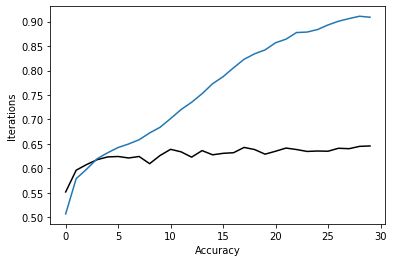

In [125]:
plt.plot(histq.history['val_accuracy'],color='black')
plt.plot(histq.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

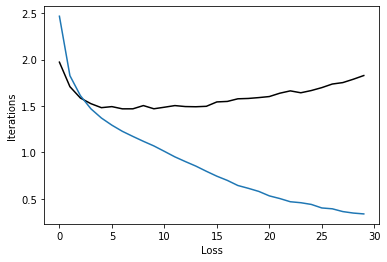

In [126]:
plt.plot(histq.history['val_loss'],color='black')
plt.plot(histq.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Bidirectional LSTM**

In [127]:

lsmodq = lstmm()

lshistq = lsmodq.fit(X_train,Y_train,
         epochs = 30,
         batch_size = 128,
         validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5406 samples, validate on 2318 samples
Epoch 1/30
5406/5406 [==============================] - 81s 15ms/step - loss: 4.3190 - acc: 0.4661 - val_loss: 2.3446 - val_acc: 0.5190
Epoch 2/30
5406/5406 [==============================] - 77s 14ms/step - loss: 2.1894 - acc: 0.5109 - val_loss: 2.1143 - val_acc: 0.5190
Epoch 3/30
5406/5406 [==============================] - 78s 14ms/step - loss: 2.1125 - acc: 0.5109 - val_loss: 2.0657 - val_acc: 0.5190
Epoch 4/30
5406/5406 [==============================] - 76s 14ms/step - loss: 2.0169 - acc: 0.5303 - val_loss: 1.9113 - val_acc: 0.5958
Epoch 5/30
5406/5406 [==============================] - 77s 14ms/step - loss: 1.8530 - acc: 0.5897 - val_loss: 1.7914 - val_acc: 0.5971
Epoch 6/30
5406/5406 [==============================] - 77s 14ms/step - loss: 1.7312 - acc: 0.5910 - val_loss: 1.7122 - val_acc: 0.5966
Epoch 7/30
5406/5406 [==============================] - 77s 14ms/step - loss: 1.6375 - acc: 0.5930 - val_loss: 1.6571 - val_acc: 0.5979


In [128]:
model.append('Bidirectional LSTM Model')
scores = lsmodq.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = lsmodq.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)




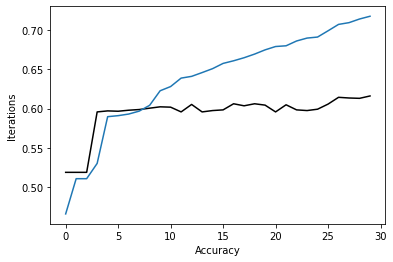

In [129]:
plt.plot(lshistq.history['val_acc'],color='black')
plt.plot(lshistq.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

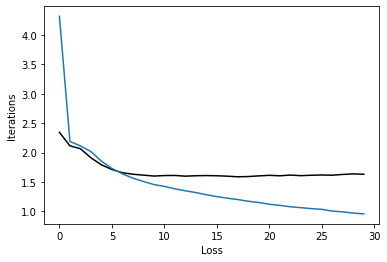

In [130]:
plt.plot(lshistq.history['val_loss'],color='black')
plt.plot(lshistq.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **1D Convolution**

In [131]:
  
convmodq = conv1d()



convhistq = convmodq.fit(X_train, Y_train,
                      epochs = 30,
                      batch_size = 128,
                      validation_data = (X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 5406 samples, validate on 2318 samples
Epoch 1/30
5406/5406 [==============================] - 36s 7ms/step - loss: 3.8288 - acc: 0.4822 - val_loss: 2.8309 - val_acc: 0.5349
Epoch 2/30
5406/5406 [==============================] - 37s 7ms/step - loss: 1.9760 - acc: 0.5609 - val_loss: 2.1415 - val_acc: 0.5971
Epoch 3/30
5406/5406 [==============================] - 35s 7ms/step - loss: 1.6897 - acc: 0.5853 - val_loss: 1.8200 - val_acc: 0.6027
Epoch 4/30
5406/5406 [==============================] - 36s 7ms/step - loss: 1.5189 - acc: 0.6027 - val_loss: 1.6109 - val_acc: 0.6083
Epoch 5/30
5406/5406 [==============================] - 35s 7ms/step - loss: 1.4000 - acc: 0.6199 - val_loss: 1.5312 - val_acc: 0.6307
Epoch 6/30
5406/5406 [==============================] - 37s 7ms/step - loss: 1.2959 - acc: 0.6509 - val_loss: 1.4492 - val_acc: 0.6484
Epoch 7/30
5406/5406 [==============================] - 35s 6ms/step - loss: 1.2001 - acc: 0.6748 - val_loss: 1.4103 - val_acc: 0.6549
Epoch 8

In [132]:
model.append('1D Convolution Model')
scores = convmodq.evaluate(X_test, Y_test, verbose=0)
accuracytest.append(scores[1]*100)
scores = convmodq.evaluate(X_train, Y_train, verbose=0)
accuracytrain.append(scores[1]*100)

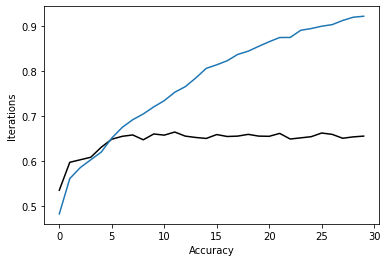

In [133]:
plt.plot(convhistq.history['val_acc'],color='black')
plt.plot(convhistq.history['acc'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

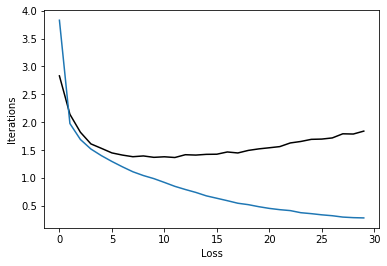

In [134]:
plt.plot(convhistq.history['val_loss'],color='black')
plt.plot(convhistq.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()

#### **Model Selection for Cluster 2**


In [135]:
cluster1_accuracies=pd.DataFrame()
cluster1_accuracies['Model']=model
cluster1_accuracies['Accuracy(Test)']=accuracytest
cluster1_accuracies['Accuracy(Train)']=accuracytrain
cluster1_accuracies

,Model,Accuracy(Test),Accuracy(Train)
0,Logistic Regression with Chi Square,52.717860,51.775805
1,Multinomial Naive Bayes,62.467645,62.282649
2,Support Vector Machines,73.080242,85.738069
3,Decision Tree,61.130285,61.746208
4,Bagging Classifier,59.232097,59.027007
5,Adaboost Classifier,57.290768,56.918239
6,Gradient Boost Classifier,68.162209,94.265631
7,Decision Tree Hyper Tuned,65.228645,78.246393
8,Support Vector Machines- Hypertuned,75.496117,97.225305
9,Sequential Model,64.581537,93.211246


<BarContainer object of 12 artists>

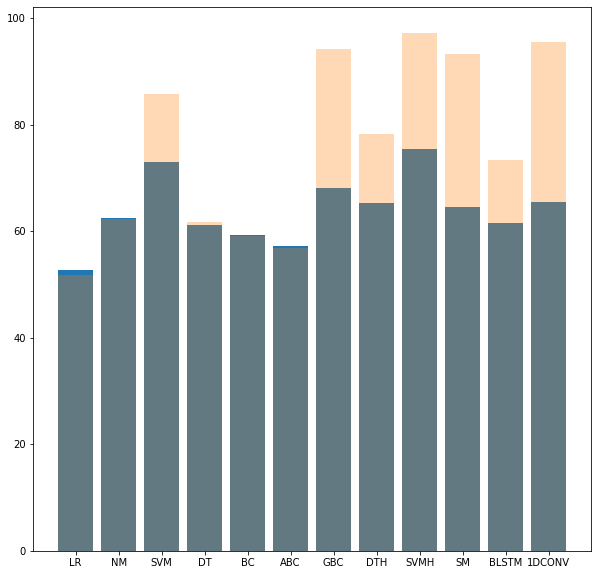

In [136]:
x_axis=['LR','NM','SVM','DT','BC','ABC','GBC','DTH','SVMH','SM','BLSTM','1DCONV']
plt.figure(figsize=(10,10))
plt.bar(x_axis,cluster1_accuracies['Accuracy(Test)'])
plt.bar(x_axis,cluster1_accuracies['Accuracy(Train)'],alpha=0.3)

> LR-Logistic Regression

> NM- Multinomial Naive Bayes

>SVM-Support Vector Machine

>DT- Decision Tree

>BC-Bagging Classifier

>ABC-AdaBoost Classifier

>GBC-Gradient Boost Classifier

>DTH- Decision Tree - Hyper Tunes

>SVMH- Support Vector Machine Hyper Tuned

>SM-Sequential Model

>BLSTM-Bidirectional LSTM

>1DCONV-1D Convolution


#### **Model Selection**
> The grey bar shows the accuracy on Train data and Yello shows the accuracy on Test data. 

> Higher the difference, the model is overfit

> Out of all, Hyper tuned Support Vector Machines seems to be the best of all
